In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

In [6]:
# 1. Load Dataset
data_path = Path("data.csv")
df = pd.read_csv(data_path)

print("✅ Dataset loaded:", df.shape)
print(df.head())

✅ Dataset loaded: (43744, 9)
    Age  Gender  Education  Introversion Score  Sensing Score  Thinking Score  \
0  21.0  Female          1             5.89208       2.144395         7.32363   
1  24.0  Female          1             2.48366       3.206188         8.06876   
2  26.0  Female          1             7.02910       6.469302         4.16472   
3  30.0    Male          0             5.46525       4.179244         2.82487   
4  31.0  Female          0             3.59804       6.189259         5.31347   

   Judging Score Interest Personality  
0       5.462224     Arts        ENTP  
1       3.765012  Unknown        INTP  
2       5.454442   Others        ESFP  
3       5.080477   Sports        ENFJ  
4       3.677984   Others        ISFP  


In [7]:
# 2️⃣ Define features and target
target = "Personality"
X = df.drop(columns=[target])
y = df[target]

In [8]:
# Encode target (MBTI labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [9]:
# 3️⃣ Define preprocessing
num_features = ["Age", "Education", "Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"]
cat_features = ["Gender", "Interest"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

In [10]:
# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [11]:
# 5️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}


🔍 Training and evaluating models...


Logistic Regression Results:
              precision    recall  f1-score   support

        ENFJ       0.88      0.83      0.85       546
        ENFP       0.90      0.82      0.86       546
        ENTJ       0.84      0.85      0.84       547
        ENTP       0.85      0.82      0.83       547
        ESFJ       0.81      0.88      0.84       547
        ESFP       0.88      0.85      0.86       546
        ESTJ       0.81      0.86      0.84       547
        ESTP       0.84      0.85      0.85       547
        INFJ       0.87      0.82      0.85       547
        INFP       0.88      0.80      0.84       547
        INTJ       0.88      0.84      0.86       547
        INTP       0.87      0.82      0.84       547
        ISFJ       0.81      0.89      0.85       547
        ISFP       0.84      0.90      0.87       547
        ISTJ       0.80      0.90      0.85       547
        ISTP       0.84      0.86      0.85       547

    accuracy

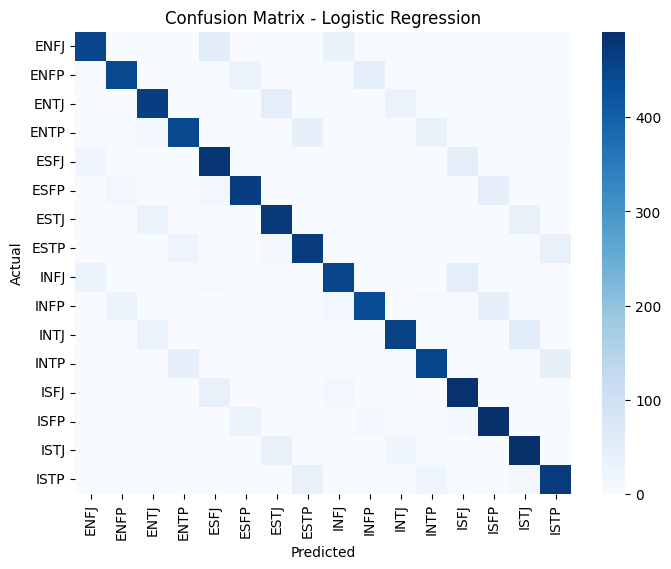


Support Vector Machine Results:
              precision    recall  f1-score   support

        ENFJ       0.87      0.84      0.85       546
        ENFP       0.89      0.77      0.82       546
        ENTJ       0.87      0.86      0.87       547
        ENTP       0.88      0.80      0.84       547
        ESFJ       0.82      0.88      0.85       547
        ESFP       0.89      0.83      0.86       546
        ESTJ       0.82      0.91      0.86       547
        ESTP       0.84      0.86      0.85       547
        INFJ       0.87      0.83      0.85       547
        INFP       0.89      0.76      0.82       547
        INTJ       0.85      0.88      0.86       547
        INTP       0.88      0.82      0.85       547
        ISFJ       0.81      0.90      0.85       547
        ISFP       0.81      0.89      0.85       547
        ISTJ       0.81      0.89      0.85       547
        ISTP       0.83      0.85      0.84       547

    accuracy                           0.85    

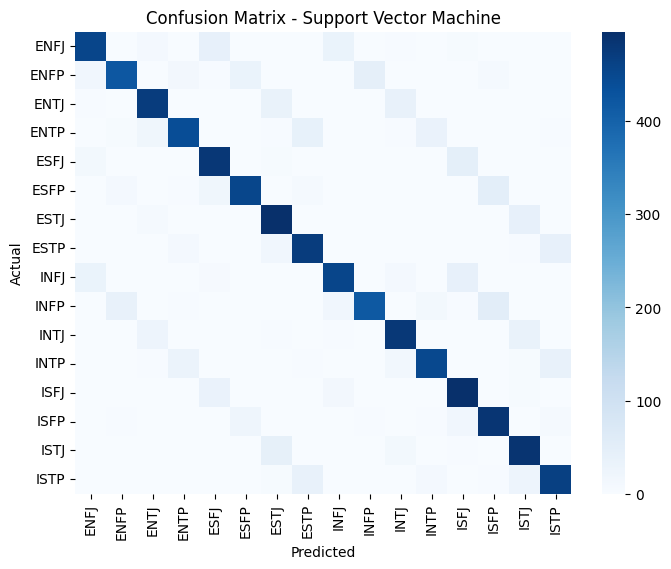


Random Forest Results:
              precision    recall  f1-score   support

        ENFJ       0.92      0.88      0.90       546
        ENFP       0.92      0.85      0.89       546
        ENTJ       0.93      0.88      0.91       547
        ENTP       0.93      0.87      0.90       547
        ESFJ       0.88      0.89      0.89       547
        ESFP       0.89      0.90      0.90       546
        ESTJ       0.91      0.93      0.92       547
        ESTP       0.89      0.90      0.90       547
        INFJ       0.92      0.89      0.90       547
        INFP       0.88      0.88      0.88       547
        INTJ       0.92      0.91      0.91       547
        INTP       0.90      0.87      0.89       547
        ISFJ       0.87      0.93      0.90       547
        ISFP       0.86      0.92      0.89       547
        ISTJ       0.91      0.95      0.93       547
        ISTP       0.85      0.92      0.89       547

    accuracy                           0.90      8749
  

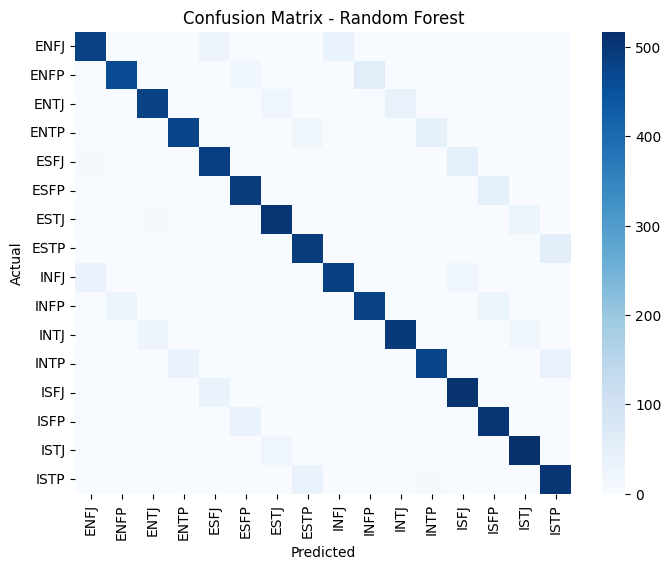


Gradient Boosting Results:
              precision    recall  f1-score   support

        ENFJ       0.91      0.88      0.89       546
        ENFP       0.92      0.87      0.89       546
        ENTJ       0.93      0.91      0.92       547
        ENTP       0.92      0.90      0.91       547
        ESFJ       0.88      0.93      0.90       547
        ESFP       0.90      0.90      0.90       546
        ESTJ       0.89      0.93      0.91       547
        ESTP       0.87      0.93      0.90       547
        INFJ       0.92      0.88      0.90       547
        INFP       0.90      0.87      0.89       547
        INTJ       0.95      0.88      0.91       547
        INTP       0.93      0.86      0.89       547
        ISFJ       0.89      0.92      0.90       547
        ISFP       0.86      0.94      0.90       547
        ISTJ       0.90      0.92      0.91       547
        ISTP       0.88      0.91      0.89       547

    accuracy                           0.90      874

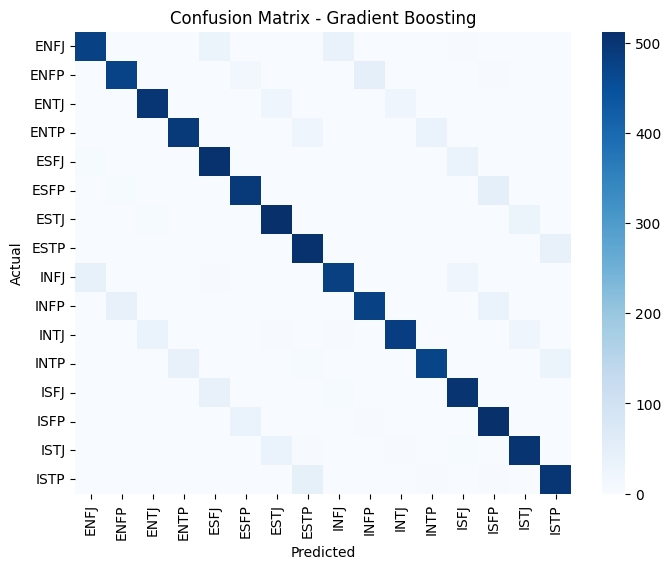

c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
              precision    recall  f1-score   support

        ENFJ       0.92      0.87      0.89       546
        ENFP       0.91      0.86      0.88       546
        ENTJ       0.91      0.88      0.89       547
        ENTP       0.94      0.87      0.90       547
        ESFJ       0.89      0.90      0.90       547
        ESFP       0.88      0.89      0.88       546
        ESTJ       0.90      0.93      0.91       547
        ESTP       0.89      0.90      0.90       547
        INFJ       0.90      0.88      0.89       547
        INFP       0.87      0.87      0.87       547
        INTJ       0.92      0.87      0.89       547
        INTP       0.89      0.88      0.88       547
        ISFJ       0.87      0.92      0.90       547
        ISFP       0.84      0.90      0.87       547
        ISTJ       0.90      0.93      0.92       547
        ISTP       0.85      0.91      0.88       547

    accuracy                           0.89      8749
   macro

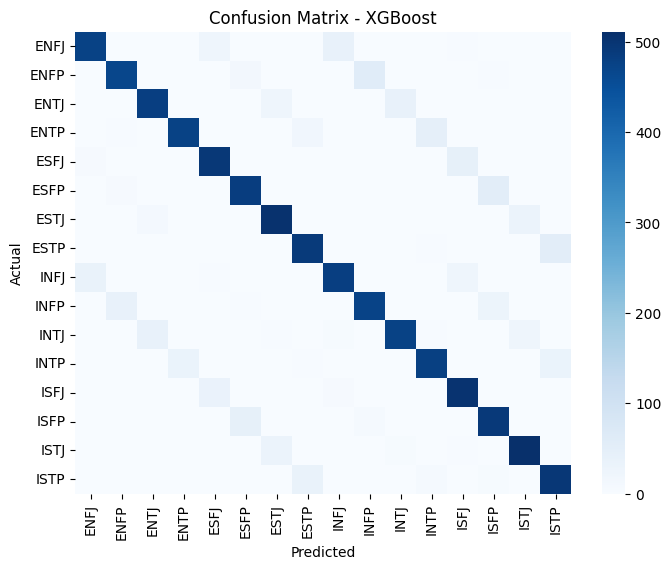

In [12]:
# 6️⃣ Train and evaluate each
results = []
print("\n🔍 Training and evaluating models...\n")

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results.append([name, acc, prec, rec, f1])
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_, annot=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


📊 Model Performance Summary:
                    Model  Accuracy  Precision    Recall  F1-Score
3       Gradient Boosting  0.901132   0.902191  0.901132  0.901123
2           Random Forest  0.898846   0.899783  0.898846  0.898840
4                 XGBoost  0.891645   0.892476  0.891645  0.891667
1  Support Vector Machine  0.848897   0.851341  0.848897  0.848649
0     Logistic Regression  0.848440   0.850372  0.848440  0.848450


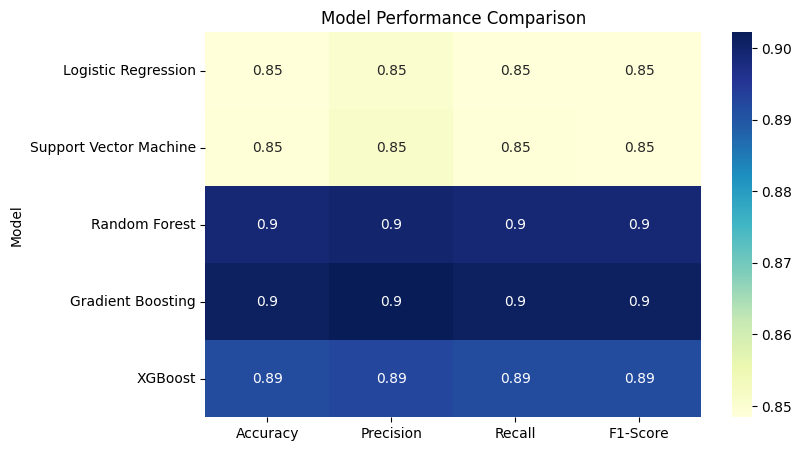

In [13]:
# 7️⃣ Compare models
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n📊 Model Performance Summary:")
print(results_df.sort_values("Accuracy", ascending=False))

plt.figure(figsize=(8, 5))
sns.heatmap(results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]], annot=True, cmap="YlGnBu")
plt.title("Model Performance Comparison")
plt.show()

In [14]:
# 8️⃣ Save best model
best_model_name = results_df.sort_values("Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")

final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])
final_pipe.fit(X, y_encoded)

# Save model and label encoder
joblib.dump({"model": final_pipe, "encoder": le}, "best_model.joblib")
print("💾 Saved model to best_model.joblib")



🏆 Best Model Selected: Gradient Boosting
💾 Saved model to best_model.joblib


In [17]:
import joblib
from sklearn.pipeline import Pipeline

final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

final_pipe.fit(X, y_encoded)

# Save both the full pipeline and the label encoder
joblib.dump(final_pipe, "best_model.joblib")
joblib.dump(le, "label_encoder.joblib")

print("✅ Saved full preprocessing + model pipeline successfully!")



✅ Saved full preprocessing + model pipeline successfully!


In [18]:
# 9️⃣ Test one prediction
sample = X.sample(1, random_state=42)
true_label = le.inverse_transform(y_encoded[sample.index])[0]
pred_label = le.inverse_transform(final_pipe.predict(sample))[0]
print("\n🧩 Example Prediction:")
print(sample)
print(f"True: {true_label}, Predicted: {pred_label}")


🧩 Example Prediction:
       Age Gender  Education  Introversion Score  Sensing Score  \
5525  28.0   Male          1             5.83049       6.262963   

      Thinking Score  Judging Score Interest  
5525         8.75006       6.634692  Unknown  
True: ESTP, Predicted: ESTP
